#Causalidad de Granger: caso clases IPC e IPRI 

**Ver caso de uso Causalidad de Granger: IPC e IPRI general

Se procede aquí a analizar <ins> el impacto de cada una de las clases del IPC e IPRI sobre las demás </ins> de forma que se muestre en qué medida la evolución de una de las series se traslada a las restantes.

Para ello utilizaremos el concepto de **causalidad de Granger**.

Dicho concepto considera que una serie temporal X *causa-granger* una serie temporal Y si la predicción de Y dados los valores pasados de X e Y es mejor que la predicción de Y dado sólo los valores de Y. Es decir, se dice que X causa-granger Y cuando los valores pasados de X aportan capacidad predictiva.

Con el objetivo de llevarlo a cabo, se realizarán los siguientes pasos:


1.   Cargar el dataset que contiene las series temporales (2002M01-2020M2) de:

> *   IPC: Índice general más los 12 grupos ECOICOP
> *   IPRI: índice general más las 4 secciones en las que se desagrega

2.   Convertir las series (si no lo fueran) es estacionarias - Test Dickey-Fuller mediante una función.
3. Realizar el test de causalidad de Granger a través de una función para cada una de las series.
4. Representar los resultados obtenidos con un heat map.


##Datos

En un primer paso, cargamos los paquetes que se van a utilizar y subimos el dataset con el que vamos a trabajar

In [ ]:
#Importamos los paquetes que vamos a usar 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot #gráficos
import seaborn as sns #gráficos
from statsmodels.tsa.stattools import adfuller #test dickey-fuller
from statsmodels.tsa.stattools import grangercausalitytests #test de granger

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
dataset = 'causalidad_granger_ipc_ipri.xlsx'
data = pd.read_excel(dataset, sheet_name='Datos', header = 0)

data.head(6)

Saving causalidad_granger_ipc_ipri.xlsx to causalidad_granger_ipc_ipri.xlsx


,año,ipc_general,ipc_alimentos,ipc_bebidas,ipc_vestido,ipc_vivienda,ipc_menaje,ipc_sanidad,ipc_transporte,ipc_comunicaciones,ipc_ocio,ipc_enseñanza,ipc_restaurantes,ipc_otros,ipri_general,ipri_manufacturera,ipri_energia,ipri_agua,ipri_extractivas
0,2002M01,69.530,65.859,46.340,82.717,58.763,81.364,86.313,63.805,128.593,101.553,58.352,63.523,65.705,71.688,75.111,55.917,NaN,77.080
1,2002M02,69.590,65.836,46.348,81.782,58.888,81.475,86.844,64.089,126.667,101.580,58.430,64.123,65.834,71.767,75.279,55.858,NaN,77.163
2,2002M03,70.165,66.185,46.436,83.519,59.041,81.819,87.210,65.007,125.098,103.157,58.496,64.756,66.045,72.165,75.698,55.320,NaN,77.163
3,2002M04,71.118,66.614,48.321,89.456,59.223,82.336,87.665,66.018,125.098,102.658,58.556,65.182,66.185,72.483,76.200,55.141,NaN,77.413
4,2002M05,71.374,66.902,48.446,90.427,59.324,82.686,87.212,66.191,125.098,102.968,58.563,65.416,66.299,72.643,76.284,55.201,NaN,77.330
5,2002M06,71.377,67.075,48.447,89.997,59.470,82.920,87.501,65.545,124.891,103.616,58.571,65.696,66.381,72.404,76.033,55.141,NaN,78.163


Una vez cargado el dataset, procedemos a poner los datos de manera que nos permita trabajar

In [ ]:
#indexamos año

data_1 = data.set_index('año')
data_1.head(6)

,ipc_general,ipc_alimentos,ipc_bebidas,ipc_vestido,ipc_vivienda,ipc_menaje,ipc_sanidad,ipc_transporte,ipc_comunicaciones,ipc_ocio,ipc_enseñanza,ipc_restaurantes,ipc_otros,ipri_general,ipri_manufacturera,ipri_energia,ipri_agua,ipri_extractivas
año,,,,,,,,,,,,,,,,,,
2002M01,69.530,65.859,46.340,82.717,58.763,81.364,86.313,63.805,128.593,101.553,58.352,63.523,65.705,71.688,75.111,55.917,NaN,77.080
2002M02,69.590,65.836,46.348,81.782,58.888,81.475,86.844,64.089,126.667,101.580,58.430,64.123,65.834,71.767,75.279,55.858,NaN,77.163
2002M03,70.165,66.185,46.436,83.519,59.041,81.819,87.210,65.007,125.098,103.157,58.496,64.756,66.045,72.165,75.698,55.320,NaN,77.163
2002M04,71.118,66.614,48.321,89.456,59.223,82.336,87.665,66.018,125.098,102.658,58.556,65.182,66.185,72.483,76.200,55.141,NaN,77.413
2002M05,71.374,66.902,48.446,90.427,59.324,82.686,87.212,66.191,125.098,102.968,58.563,65.416,66.299,72.643,76.284,55.201,NaN,77.330
2002M06,71.377,67.075,48.447,89.997,59.470,82.920,87.501,65.545,124.891,103.616,58.571,65.696,66.381,72.404,76.033,55.141,NaN,78.163


In [ ]:
#eliminamos tanto las series generales (ipri_general e ipc_general) porque ya las hemos estudiado antes
#así como ipri_agua porque tiene valores nulos y no se puede operar con ellos

data_2 = data_1.drop(['ipc_general', 'ipri_general', 'ipri_agua'], axis=1)
data_2.head(6)

,ipc_alimentos,ipc_bebidas,ipc_vestido,ipc_vivienda,ipc_menaje,ipc_sanidad,ipc_transporte,ipc_comunicaciones,ipc_ocio,ipc_enseñanza,ipc_restaurantes,ipc_otros,ipri_manufacturera,ipri_energia,ipri_extractivas
año,,,,,,,,,,,,,,,
2002M01,65.859,46.340,82.717,58.763,81.364,86.313,63.805,128.593,101.553,58.352,63.523,65.705,75.111,55.917,77.080
2002M02,65.836,46.348,81.782,58.888,81.475,86.844,64.089,126.667,101.580,58.430,64.123,65.834,75.279,55.858,77.163
2002M03,66.185,46.436,83.519,59.041,81.819,87.210,65.007,125.098,103.157,58.496,64.756,66.045,75.698,55.320,77.163
2002M04,66.614,48.321,89.456,59.223,82.336,87.665,66.018,125.098,102.658,58.556,65.182,66.185,76.200,55.141,77.413
2002M05,66.902,48.446,90.427,59.324,82.686,87.212,66.191,125.098,102.968,58.563,65.416,66.299,76.284,55.201,77.330
2002M06,67.075,48.447,89.997,59.470,82.920,87.501,65.545,124.891,103.616,58.571,65.696,66.381,76.033,55.141,78.163


Teniendo ya las series que vamos a estudiar listas, procedemos a un primer contacto con ellas mediante su representación.

Las series temporales para poder trabajar con ellas deben ser estacionarias

#Análisis de los datos y transformación

Una vez se han cargado los datos, para poder aplicar el test de causalidad de Granger, es necesario que las series sean estacionarias.

Las series temporales, teóricamente, se caracterizan por estar formadas por tres componentes: la tendencia (T<sub>t</sub>), la componente estacional (E<sub>t</sub>) y la componente aleatoria (I<sub>t</sub>)

> $X_{t} = T_{t} + E_{t} + I_{t}$


Así, se dice que una serie temporal es **estacionaria** cuando dicha serie se mantiene estable en el tiempo, es decir, cuando la media y la varianza son constantes. Gráficamente puede observarse cuando los valores se mueven alrededor de una media constante y la variabilidad respecto de esa media también es persistente en el tiempo. (1)

¿Y por qué es importante que una serie sea estacionaria? Porque es más fácil de predecir, puesto que si la media y la varianza de mantienen constantes, se considera que hay una gran probabilidad de que en el futuro continuen comportándose de la misma manera.

###Análisis gráfico

En una primera aproximación se puede observar gráficametente si las series muestran indicios de no ser estacionarias.

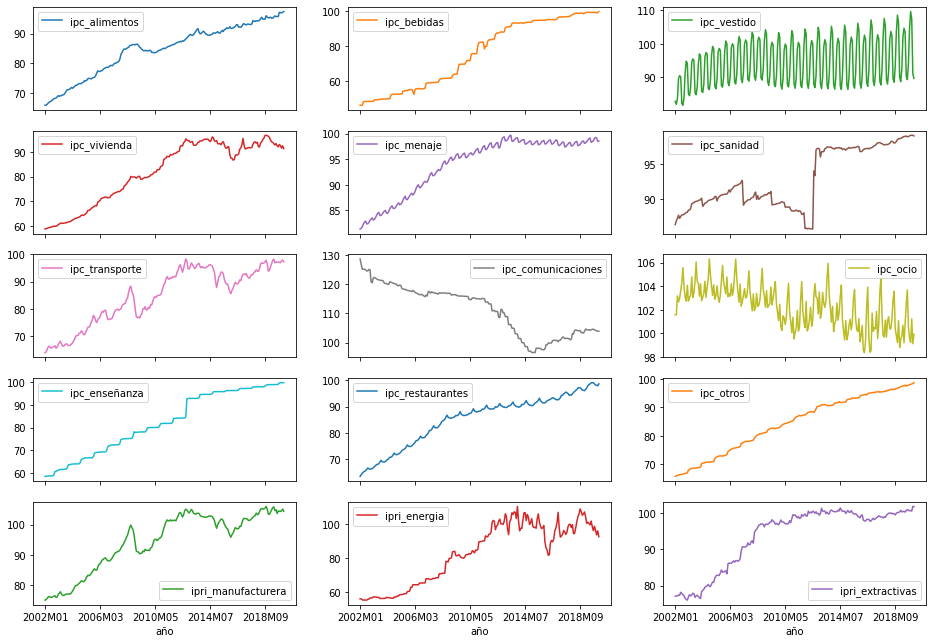

In [ ]:
data_2.plot(subplots=True, layout=(5,3), figsize=(16,11));

Como puede observarse a simple vista, parece que ninguna de las series son estacionarias, pues no muestran una media constante. En ambos casos se observa la presencia de tendencia (un aumento de la media en el tiempo).

###Test de Dickey-Fuller (aumentado)

Para contrastar estos resultados, econométricamente puede comprobarse si una serie es estacionaria o no aplicando el **test de Dickey-Fuller**.

Este test busca determinar la existencia o no de raíces unitarias en una serie temporal. Dicho de otra manera, el test permite conocer, a través de un contraste de hipótesis, si hay presencia significativa de tendencia en la serie temporal.

Dichas hipótesis serían:

*   Hipótesis nula (H<sub>0</sub>): la serie tiene raíz unitaria *(→ la serie no es estacionaria)*
*   Hipótesis alternativa (H<sub>1</sub>): la serie no tiene raíz unitaria *(→  la serie es estacionaria)*

También podrían verse como:

*   H<sub>0</sub>: Hay tendencia estocástica. 
*   H<sub>1</sub>: No hay tendencia estocástica.

Así, se ha definido una función que permita, al introducir cualquier dataset con series temporales, estacionarizar cada una de dichas series (mediante diferencias) y que devuelva un dataframe compuesto por todas esas series ya estacionarizadas, así como indicar que efectivamente cada serie es estacionaria (si alguna no lo fuera por no haberse conseguido ni con segundas diferencias, habría que buscar otro método para convertirla).

In [ ]:
def funcion_granger(df):
  serie_completa = pd.DataFrame()
  for columna in df.columns[0:]:
    estacionariedad = adfuller(df[columna])
    if estacionariedad[1] < 0.05:
      serie = df[columna]
      serie_completa = pd.concat([serie_completa, serie], axis=1)
    else:
      serie_transformada = df[columna].diff().dropna()
      #df = df.iloc[1:] #si se quita ya si sale (lo puse porque era como se tenía que hacer en el caso de las series ipc e ipri individuales)
      estacionariedad_serie_transformada = adfuller(serie_transformada)  
      
      if estacionariedad_serie_transformada[1] < 0.05:
        serie_completa = pd.concat([serie_completa, serie_transformada], axis=1)
        print('la serie', columna, 'es estacionaria')
      else:
        serie_transformada_2 = serie_transformada.diff().dropna()
        #df = df.iloc[1:]
        serie_transformada = serie_transformada.iloc[1:]
        estacionariedad_serie_transformada_2 = adfuller(serie_transformada_2)

        if estacionariedad_serie_transformada_2[1] < 0.05:
          serie_completa = pd.concat([serie_completa, serie_transformada_2], axis=1)
          print('la serie', columna, 'es estacionaria')
        else:
          print('la serie', columna, 'no es estacionaria')

  return serie_completa.dropna()

series_estacionarias = funcion_granger(data_2) #para guardar los resultados que salen de la función (guardar el dataframe de las series ya estacionarizadas)

la serie ipc_alimentos es estacionaria
la serie ipc_bebidas es estacionaria
la serie ipc_vestido es estacionaria
la serie ipc_vivienda es estacionaria
la serie ipc_menaje es estacionaria
la serie ipc_sanidad es estacionaria
la serie ipc_transporte es estacionaria
la serie ipc_comunicaciones es estacionaria
la serie ipc_ocio es estacionaria
la serie ipc_enseñanza es estacionaria
la serie ipc_restaurantes es estacionaria
la serie ipc_otros es estacionaria
la serie ipri_manufacturera es estacionaria
la serie ipri_energia es estacionaria
la serie ipri_extractivas es estacionaria


Comprobamos que se ha generado correctamente el dataframe con las series ya estacionarizadas:

In [ ]:
series_estacionarias

,ipc_alimentos,ipc_bebidas,ipc_vestido,ipc_vivienda,ipc_menaje,ipc_sanidad,ipc_transporte,ipc_comunicaciones,ipc_ocio,ipc_enseñanza,ipc_restaurantes,ipc_otros,ipri_manufacturera,ipri_energia,ipri_extractivas
2002M03,0.349,0.088,2.672,0.153,0.233,0.366,0.918,0.357,1.577,-0.012,0.033,0.082,0.419,-0.538,-0.083
2002M04,0.429,1.885,4.200,0.182,0.173,0.455,1.011,1.569,-0.499,-0.006,-0.207,-0.071,0.502,-0.179,0.250
2002M05,0.288,0.125,-4.966,0.101,-0.167,-0.453,0.173,0.000,0.310,-0.053,-0.192,-0.026,0.084,0.060,-0.333
2002M06,0.173,0.001,-1.401,0.146,-0.116,0.289,-0.646,-0.207,0.648,0.001,0.046,-0.032,-0.251,-0.060,0.916
2002M07,0.279,0.028,-7.480,0.137,-0.796,0.199,0.040,-0.184,0.692,0.008,0.208,-0.053,0.000,0.000,-1.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019M10,1.425,0.036,5.680,0.973,0.330,0.094,-0.181,-0.330,-0.930,0.499,-0.371,0.076,-0.041,2.576,0.050
2019M11,-0.033,-0.043,-5.419,-0.410,-0.300,0.062,-0.119,0.192,-0.357,-0.581,-0.063,0.007,-0.112,-2.368,0.192
2019M12,-0.162,-0.325,-7.389,-1.054,-0.316,0.025,0.665,-0.177,1.996,-0.030,0.383,-0.004,0.252,-2.725,-0.189
2020M01,0.262,0.420,-14.145,0.907,-0.503,-0.016,0.309,0.209,-2.100,0.003,-0.128,0.010,0.555,2.328,1.436


Examinamos de nuevo gráficamente las series para verificar dicha transformación

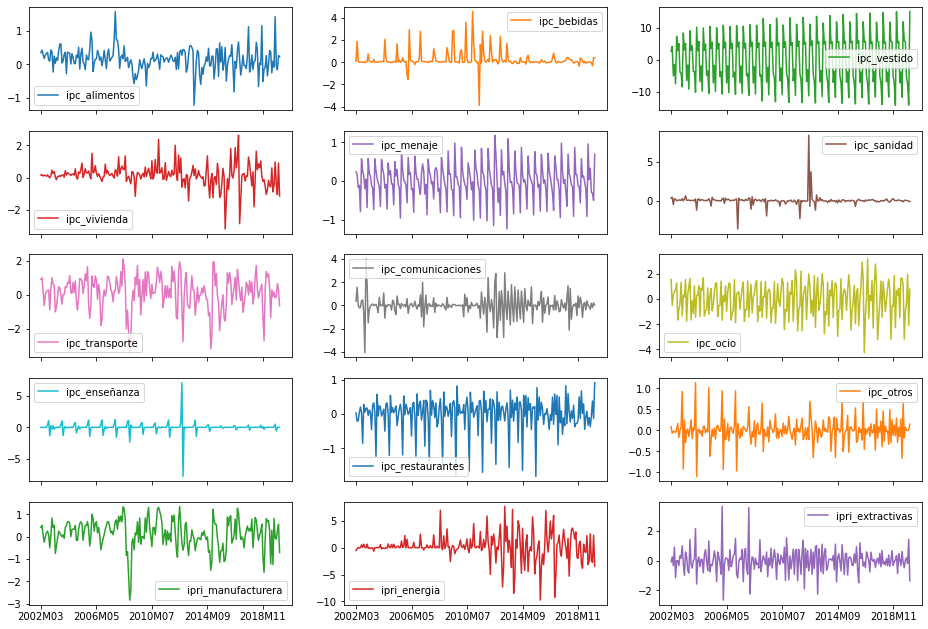

In [ ]:
series_estacionarias.plot(subplots=True, layout=(5,3), figsize=(16,11));

##Test de Causalidad de Granger

Una vez estacionarizadas las series, se puede proceder a realizar el test de Granger.

Como se mencionó al principio, la prueba estadística de **causalidad de Granger** sirve para determinar si una serie temporal puede predecir a otra. Así, se sustenta en la idea de que si una serie X causa otra Y, entonces serán mejores predictivamente los modelos de Y que usen retardos de X e Y *(modelo no restringido)*, que aquellos que solo empleen datos retrasados de Y *(modelo restringido)*.

> Modelo restringido: $y_{t} = \beta_{0} + \beta_{1}y_{t-1} + ... + \beta_{p}y_{t-p} + ϵ $

> Modelo no restringido: $y_{t} = \beta_{0} + \beta_{1}y_{t-1} + ... + \beta_{p}y_{t-p} + α_{1}x_{t-1} + ... + α_{p}x_{t-p} + ƞ$

Este concepto fue desarrollado por el Premio Nobel Clive W.J Granger para mejorar la actuación de las predicciones. Es básicamente un test para verificar el uso de una variable en la predicción de otra en una serie temporal multivariante con un determinado retardo (lag).

Así, las hipótesis de dicho test serían:

* Hipótesis nula (H<sub>0</sub>): X<sub>t</sub> no causa-granger Y<sub>t</sub>
* Hipótesis alternativa (H<sub>1</sub>): X<sub>t</sub> causa-granger Y<sub>t</sub>

Con tal fin se ha construido otra función, la cual procede a realizar el test de causalidad de Granger entre aquellas series que se han proporcionado en un dataframe. 

**Cómo funciona**: a la función se le proporciona como argumento un dataframe con series temporales. Ésta realiza el test de causalidad para cada par de series, guarda el p-valor del estadístico (en este caso el de ssr based F test), y lo transforma en 0 si el estadístico es mayor a 0.05 (la serie A no causa-granger la serie B) y en 1 en caso contrario (la serie A causa-granger la serie B). Una vez realizado este procedimiento con cada par, se obtiene un dataframe con dichos 0 y 1 y sus respectivas variables de cruce.

In [ ]:
def funcion_granger_5(serie_test):
  simul_3 = []
  thisdict_1 = []
  for columna in serie_test.columns[0:]:
    for i in serie_test.columns[0:]:
      granger_test = grangercausalitytests(serie_test[[columna, i]], maxlag=4, verbose=False)
      simul = granger_test[4][0] #para seleccionar solo los datos del lag que queremos
      simul_1 = simul['ssr_ftest'][1]
      simul_3.append(simul_1) #CUANDO SE HACE UN APPEND NO SE PUEDE CREAR UNA NUEVA VARIABLE!!! ESTARIA MAL SI SE PUSIERA simul_4 = simul_3.append(simul_1)

      if simul_1 > 0.05:
        value = 0
      else:
        value = 1

      thisdict = {
          "value": value,
          "columna": columna,
          "fila": i
          }
      thisdict_1.append(thisdict)
  #print(thisdict_1)
  df = pd.DataFrame.from_dict(thisdict_1)
  
  nombres = df['columna'].unique()
  df_8 = pd.DataFrame()
  df_8['fila'] = df['fila'].unique()
  for i in nombres:
    df_9 = df[df.columna == i].iloc[:,:3]
    df_10 = df_9.rename(columns={'value': i}).drop('columna', axis = 1)
    df_8 = pd.merge(df_8, df_10, how='left', on= 'fila')
  
  return df_8.set_index('fila')

In [ ]:
#Comprobamos que la función se ejecuta correctamente
funcion_granger_5(series_estacionarias)

,ipc_alimentos,ipc_bebidas,ipc_vestido,ipc_vivienda,ipc_menaje,ipc_sanidad,ipc_transporte,ipc_comunicaciones,ipc_ocio,ipc_enseñanza,ipc_restaurantes,ipc_otros,ipri_manufacturera,ipri_energia,ipri_extractivas
fila,,,,,,,,,,,,,,,
ipc_alimentos,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0
ipc_bebidas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ipc_vestido,1,0,0,0,1,0,0,0,1,1,1,0,0,1,1
ipc_vivienda,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
ipc_menaje,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0
ipc_sanidad,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
ipc_transporte,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
ipc_comunicaciones,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
ipc_ocio,0,0,1,0,1,0,0,1,0,1,1,1,1,0,1


In [ ]:
#Guardamos en una nueva variable dicho resultado, para poder trabajar con ese nuevo daframe originado
matriz_granger = funcion_granger_5(series_estacionarias)

##Representación gráfica

Por último, vamos a representar la nueva información obtenida a través de un heat map, para que nos permita a simple vista y de manera más sencilla estudiar y entender los datos

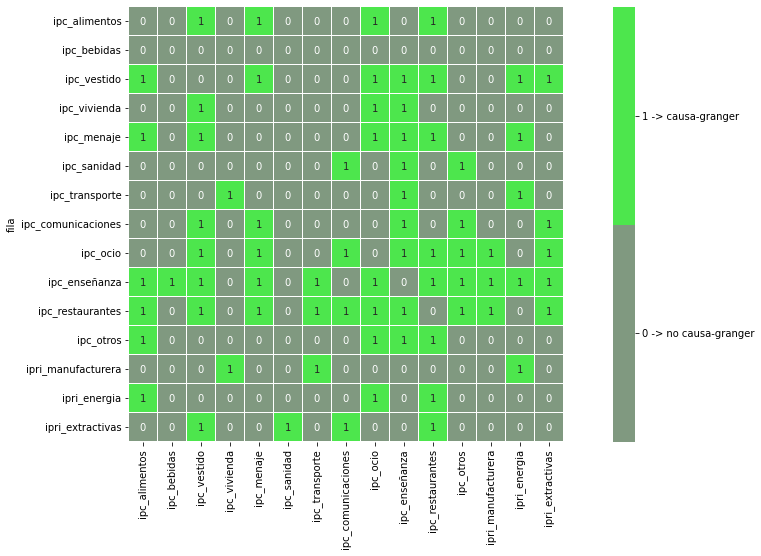

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
my_colors=[(0.5,0.6,0.5),(0.3,0.9,0.3)]

sns.heatmap(matriz_granger, cmap=my_colors, square=True, linewidth=0.1, linecolor='w', ax=ax, annot=True)

colorbar = ax.collections[0].colorbar
M=matriz_granger.max().max()
colorbar.set_ticks([2/8*M,6/8*M])
colorbar.set_ticklabels(['0 -> no causa-granger','1 -> causa-granger'])

plt.show()

(fila causa-granger columna)

P.E: ipc_alimentos causa-granger ipc_vestido, ipc_menaje, ipc_ocio, ipc_restaurantes, ipri_extractivas